# Instantons

In [ ]:
cd '/home/dpirvu/project/paper_prefactor/'

In [1]:
import os,sys
sys.path.append('/home/dpirvu/python_stuff/')
sys.path.append('/home/dpirvu/project/paper_prefactor/bubble_codes/')
#sys.path.append('/home/dpirvu/project/paper_prefactor/bubble_codes_older/')
sys.path.remove('/home/dpirvu/DarkPhotonxunWISE/hmvec-master')
print(sys.path)
from plotting import *
from bubble_tools import *
from experiment import *
from celluloid import Camera

%matplotlib inline

['/home/dpirvu/project/paper_prefactor', '/cm/shared/apps/python/python37/lib/python37.zip', '/cm/shared/apps/python/python37/lib/python3.7', '/cm/shared/apps/python/python37/lib/python3.7/lib-dynload', '', '/home/dpirvu/.local/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages/IPython/extensions', '/home/dpirvu/.ipython', '/home/dpirvu/python_stuff/', '/home/dpirvu/project/paper_prefactor/bubble_codes/']
['/home/dpirvu/project/paper_prefactor', '/cm/shared/apps/python/python37/lib/python37.zip', '/cm/shared/apps/python/python37/lib/python3.7', '/cm/shared/apps/python/python37/lib/python3.7/lib-dynload', '', '/home/dpirvu/.local/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages/IPython/extensions', '/home/dpirvu/.ipython', '/home/dpirvu/python_stuff/', '/home/dpirvu/project/paper_pr

In [2]:
from scipy.interpolate import interp2d, interp1d


In [4]:
case = 'minus'
general = get_general_model(case)
tempList, massq, right_Vmax, V, dV, Vinv, nTimeMAX, minSim, maxSim = general


In [7]:
if False:
    for tmp in [0,1,2]:
        temp, m2, sigmafld = get_model(*general, tmp)
        exp_params = [nLat, m2, temp]
        print(exp_params)

        def fun(y, x):
            Φ, Π = y
            #dydx = [Π, -Π/x+(np.sin(Φ) + 0.5*lamb**2.*np.sin(2.*Φ))*4.*nu]

            # no friction term in thermal case
            dydx = [Π, Φ - Φ**3. + 6.e-4 * Φ**5.]
            return dydx

        # as far as fortran goes:
             #1.41479 is critical
             #1.414 is sub-critical
      #  y0 = [1.41479, 0.]
        y0 = [1.41478, 0.]

        x    = xlist#np.linspace(0, int(lenLat-1), lenLat)
        phis = np.linspace(-.1,1.5, 1000)
        sol  = odeint(fun, y0, x)

        fig, ax = plt.subplots(1, 3, figsize = (10., 2.5))
        ax[0].plot(x, sol[:, 0], ls='-', label=r'$\phi(x)$')
        ax[0].plot(x, np.abs(sol[:, 0]), ls='--')
        ax[0].axhline(0., ls=':', color='darkgray')

        ax[1].plot(phis, Vinv(phis), label=r'$V$', linewidth='1', alpha=0.3)
        ax[1].plot(sol[:, 0], Vinv(sol[:, 0]))

        bound = 180
        ind  = np.argmin(np.abs(sol[:bound,0]))
        ax[0].axvline(x[ind], color='darkgray', ls='--', alpha=0.7)
        ax[0].axvline(x[bound], color='r', ls=':', alpha=0.7)
        print(x[ind], x[bound])
        inst = np.zeros(nLat//2+1)
        inst[:ind+1] = sol[:ind+1, 0]
        inst = np.concatenate((inst[::-1],inst[1:-1]))

        np.save(ansol_instanton_file(*exp_params), inst)
        np.save(subcrit_ansol_instanton_file(*exp_params), inst)

        ax[2].plot(inst)
        beautify(ax, times=-80); plt.tight_layout(); plt.show()
        print('Instanton saved.')

In [170]:
bubbleList, instantonList, tmpList = [], [], []
for tmp in [0,3]:
    temp, m2, sigmafld = get_model(*general, tmp)
    exp_params = [nLat, m2, temp]
    print('Experiment', exp_params)

    bubbleList.append(np.load(average_file(*exp_params)))
    print(average_file(*exp_params))
    instantonList.append(np.load(ansol_instanton_file(*exp_params)))
    tmpList.append(tmp)


Experiment [2048, 0.85, 0.1]
/gpfs/dpirvu/prefactor/x2048_m2eff0.8500_T0.1000_average_bubble.npy
Experiment [2048, 0.7, 0.2]
/gpfs/dpirvu/prefactor/x2048_m2eff0.7000_T0.2000_average_bubble.npy


In [171]:
def FWHM(X,Y):
    half_max = np.amax(Y)/2.
    #find when function crosses line half_max (when sign of diff flips)
    #take the 'derivative' of signum(half_max - Y[])
    d = (half_max - Y[:-1]) - (half_max - Y[1:])
    plt.plot(X[0:len(d)], d) #if you are interested
    #find the left and right most indexes
    left_idx = np.argwhere(d > 0)[0]; plt.axvline(left_idx, color='r')
    right_idx = np.argwhere(d < 0)[-1]; plt.axvline(right_idx, color='r'); plt.show()
    return X[right_idx] - X[left_idx] #return the difference (full width)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Experiment [2048, 0.85, 0.1]
indmin 201
energy 1.3673176190458947
Experiment [2048, 0.7, 0.2]
indmin 194


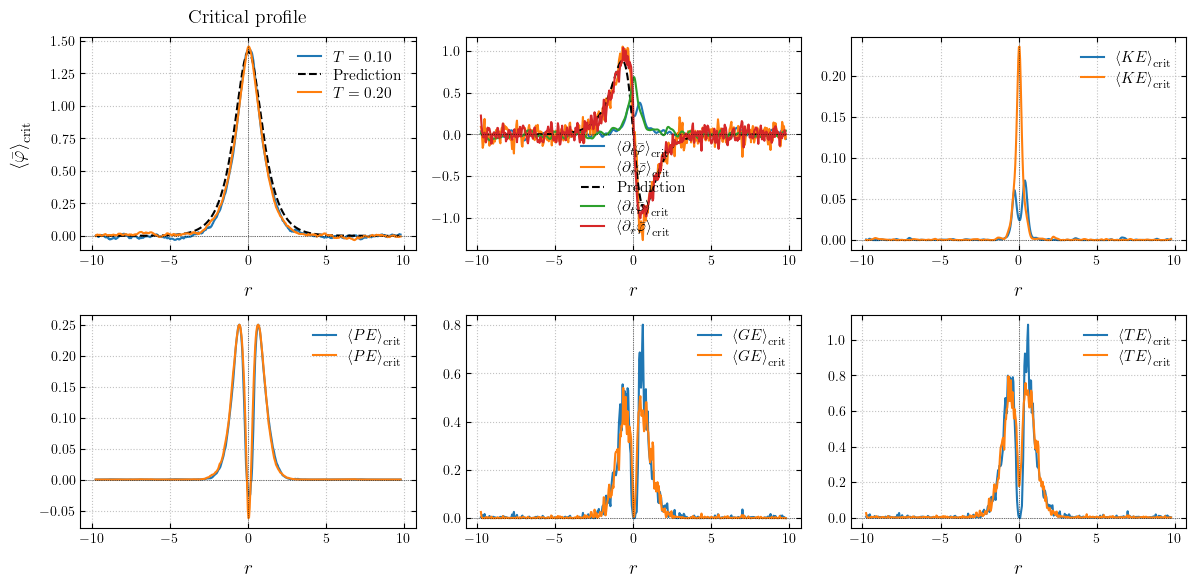

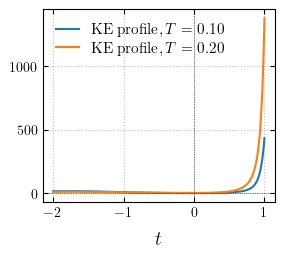

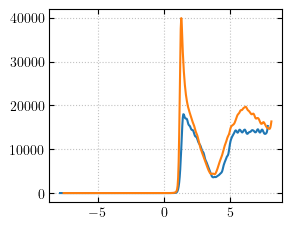

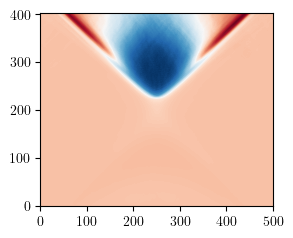

In [172]:
fig, ax = plt.subplots(2, 3, figsize = (12., 6))
fig1,ax1= plt.subplots(1, 1, figsize = (3, 2.5))
fig2,ax2= plt.subplots(1, 1, figsize = (3, 2.5))
fig3,ax3= plt.subplots(1, 1, figsize = (3, 2.5))

ax[0,0].set_ylabel(r'$\left\langle\bar{\varphi}\right\rangle_{\rm crit}$')
save_dat = []
for ii, tmp in enumerate(tmpList):
    average_bubble = bubbleList[ii]
    temp, m2, sigmafld = get_model(*general, tmp)
    exp_params = [nLat, m2, temp]
    print('Experiment', exp_params)

    nC, nT, nN  = np.shape(bubble2plot)
    intb= 10

    bubble2plot = average_bubble[0, :, 50:-50, max(1, nNn//2 - int(intb/dx)) : min(nNn//2 + int(intb/dx), nNn)-1 ]
    bubble2plot[1] = gaussian_filter(bubble2plot[1], 2, mode='nearest')
    nC, nT, nN  = np.shape(bubble2plot)
    ax3.imshow(bubble2plot[0], interpolation=None, extent=[0,nN,0,nT], aspect='auto', origin='lower', cmap='RdBu')

    # measure energies
    kinetic    = 0.5*bubble2plot[1]**2.
    potential  = V(bubble2plot[0])
    gradient   = np.gradient(bubble2plot[0], dx)[1]
    engrad     = 0.5*gradient**2.
    totEbubble = kinetic + engrad + potential

    # critical time is the slice where momentum is minimum
    totkinprof = np.sum(kinetic, axis=1)
    indmin = np.argmin(totkinprof)
    print('indmin', indmin)

    tlist = dx*(np.arange(len(totkinprof)) - indmin)
    tlistnew = np.linspace(-2,1,200)
    f = interp1d(tlist, totkinprof)
    interpkinprof = f(tlistnew)

    ax1.plot(tlistnew, interpkinprof, label=r'${{\rm KE \; profile}}, T={:.2f}$'.format(temp))
    ax2.plot(tlist, totkinprof)
    save_dat.append(np.array([tlistnew, interpkinprof - interpkinprof[np.argmin(np.abs(tlistnew))]]))

    fldslice, momslice = bubble2plot[0,indmin], bubble2plot[1,indmin]
    xls = np.linspace(-len(fldslice)//2, len(fldslice)//2, len(fldslice)) * dx

    np.save(crittimes_file(*exp_params), indmin)
    np.save(critenerg_file(*exp_params), np.sum(totEbubble[indmin]))
    np.save(critfield_file(*exp_params), np.asarray([xls, fldslice, momslice]))

#     peaks, _ = find_peaks(fldslice, height=0.01)
#     ind      = np.argmax(fldslice[peaks[:]])
#     fwhm     = peak_widths(fldslice, peaks[[ind]])
#     print('Rcrit', fwhm[0][0]/2.)

    ax[0,0].plot(xls, fldslice,          label=r'$T={:.2f}$'.format(temp))
    ax[0,1].plot(xls, momslice,          label=r'$\left\langle \partial_t \bar{\varphi} \right\rangle_{\rm crit}$')
    ax[0,1].plot(xls, gradient[indmin],  label=r'$\left\langle \partial_r \bar{\varphi} \right\rangle_{\rm crit}$')
    ax[0,2].plot(xls, kinetic[indmin],   label=r'$\left\langle KE \right\rangle_{\rm crit}$')
    ax[1,3-3].plot(xls, potential[indmin], label=r'$\left\langle PE \right\rangle_{\rm crit}$')
    ax[1,4-3].plot(xls, engrad[indmin],    label=r'$\left\langle GE \right\rangle_{\rm crit}$')
    ax[1,5-3].plot(xls, totEbubble[indmin],label=r'$\left\langle TE \right\rangle_{\rm crit}$')

    if ii==0:
        instanton = np.array(instantonList)[ii]
        instanton = instanton[np.argmax(instanton)-len(fldslice)//2 : np.argmax(instanton)+len(fldslice)//2]
        ax[0,0].plot(xls, instanton, '--k', label=r'$\rm Prediction$')

        gradinst  = (np.roll(instanton,-1) - instanton)/dx

        instantonenergy = dx * np.sum(V(instanton) + 0.5*gradinst**2., axis=0)
        print('energy', instantonenergy)
        ax[0,1].plot(xls, gradinst, '--k', label=r'$\rm Prediction$')

for ai, aa in enumerate(ax.flatten()):
    aa.set_xlabel(r'$r$')
    aa.axhline(0., ls=':', color='k', linewidth=0.5)
    aa.axvline(0., ls=':', color='k', linewidth=0.5)

beautify(ax, times=-100)
beautify(ax1,times=-100)
beautify(ax2,times=-100)

ax[0,0].set_title(r'${{\rm Critical \; profile}}$')
fig.tight_layout()
plt.savefig('./plots/profile_comparison.pdf')

ax1.set_xlabel(r'$t$')
ax1.axhline(0., ls=':', color='k', linewidth=0.5)
ax1.axvline(0., ls=':', color='k', linewidth=0.5)
plt.show()

np.save('./data_for_andrey_K.npy', save_dat)
np.save('./kinetic_energy_T0.1.npy', save_dat[0])
np.save('./kinetic_energy_T0.2.npy', save_dat[1])


In [178]:
checkT01 = np.load('./kinetic_energy_T0.1.npy')
checkT02 = np.load('./kinetic_energy_T0.2.npy')


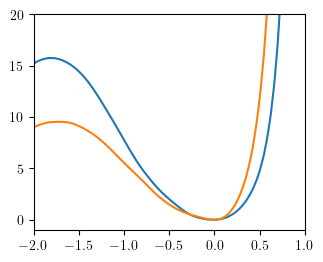

In [180]:
fig, ax = plt.subplots(1, 1, figsize = (3.5, 2.8))
plt.plot(checkT01[0,:], checkT01[1,:])
plt.plot(checkT02[0,:], checkT02[1,:])
plt.xlim(-2,1)
plt.ylim(-1,20)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


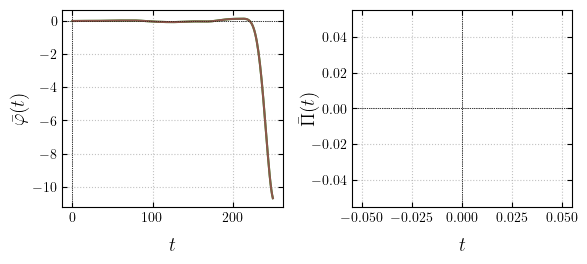

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (6., 2.8))

for ii, tmp in enumerate(tmpList):
    average_bubble = bubbleList[ii]
    temp, m2, sigmafld = get_model(*general, tmp)
    exp_params = [nLat, m2, temp]

    xls, fldslice, momslice = np.load(critfield_file(*exp_params))

    tlist = np.arange(len(bubble2plot[0])) - indmin
    ax[0].plot(tlist, bubble2plot[0,:,np.argmax(fldslice)])
    ax[0].plot(tlist, bubble2plot[0,:,np.argmax(fldslice)+1])
    ax[0].plot(tlist, bubble2plot[0,:,np.argmax(fldslice)-1])
  #  ax[1].plot(tlist, bubble2plot[1,:,np.argmax(fldslice)])
  #  ax[1].plot(tlist, bubble2plot[1,:,np.argmax(fldslice)+1])
  #  ax[1].plot(tlist, bubble2plot[1,:,np.argmax(fldslice)-1])
    ax[1].plot(tlist, 0.5*bubble2plot[1,:,np.argmax(fldslice)]**2.)

    for aa, axx in enumerate(ax.flatten()):
        axx.set_ylabel([r'$\bar{\varphi}(t)$', r'$\bar{\Pi}(t)$'][aa])
        axx.set_xlabel([r'$t$',r'$t$'][aa])
        axx.axhline(0., ls=':', color='k', linewidth=0.5)
        axx.axvline(0., ls=':', color='k', linewidth=0.5)

beautify(ax, times=-100)
fig.tight_layout()
plt.savefig('./plots/critical_tevol.pdf')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Experiment [2048, 0.85, 0.1]
Experiment [2048, 0.7, 0.2]


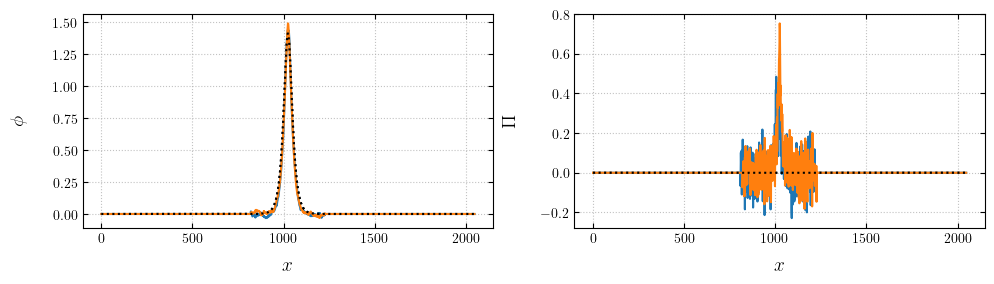

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3))
for ii, tmp in enumerate(tmpList):
    average_bubble = bubbleList[ii]
    temp, m2, sigmafld = get_model(*general, tmp)
    exp_params = [nLat, m2, temp]
    print('Experiment', exp_params)

    xls, fldslice, momslice = np.load(critfield_file(*exp_params))
    thslice = instantonList[ii]

    fldslice = np.concatenate((fldslice, phieq*np.ones(nLat-len(fldslice))), axis=0)
    fldslice = np.roll(fldslice, nLat-int(-np.abs(nLat//2 - np.argmax(fldslice))))

    momslice = np.concatenate((momslice, np.zeros(nLat-len(momslice))), axis=0)
    momslice = np.roll(momslice, nLat-int(-np.abs(nLat//2 - np.argmax(momslice))))

    ax[0].plot(fldslice)
    ax[0].plot(thslice, color='k', ls=':')
    ax[1].plot(momslice)
    ax[1].plot(np.zeros(len(momslice)), color='k', ls=':')

for aa, axx in enumerate(ax):
    axx.set_xlabel(r'$x$')
    axx.set_ylabel([r'$\phi$', r'$\Pi$'][aa])
beautify(ax, times=-90)
plt.tight_layout()
plt.show()

In [ ]:
imported = sub_inst

print(len(imported))
arrayf90 = '(/'
for ind, iii in enumerate(imported):
    arrayf90 = arrayf90 + str(iii)
    if ind != len(imported)-1:
        arrayf90 = arrayf90 + ', '
arrayf90 += '/)'
#print(arrayf90)

In [ ]:
temp, m2, sigmafld = get_model(*general, tmp)
exp_params = [nLat, m2, temp]

name = solution_sim_location(*exp_params, 0)
params, critical_sim = extract_spec_data(nLat, name)


In [ ]:
if True:
    titl = [r'$\bar{\phi}$',  r'$\bar{\Pi}$']
    fig, ax = plt.subplots(1, 2, figsize = (10, 3), sharey=True)
    for cp in range(2):
            truebubble = critical_sim[cp][:nLat//5, nLat//2 - nLat//10: nLat//2 + nLat//10]
            truebubble[truebubble > 2.] = 2.
            truebubble[truebubble <-2.] =-2.

            if cp==0: instsample = truebubble[0]

            nT, nN = np.shape(truebubble)
            ext = np.array([-nN//2,nN//2,0,nT])

            im = ax[cp].imshow(truebubble, interpolation=None, aspect='auto', extent=ext, origin='lower', cmap='tab20b')
            cbar = plt.colorbar(im, ax=ax[cp], shrink=0.7)
            cbar.ax.set_title(titl[cp])

            nT, nN = np.shape(truebubble)
            tt = np.linspace(0, nT-1, nT)
            xx = np.linspace(-nN//2, nN//2, nN)
            ttt1, xxx1 = np.meshgrid(tt, xx)

            lavs = [8, 6][cp]
        #    ax[cp].contour(xxx1, ttt1, truebubble.T, levels=lavs, aspect='auto', \
        #                   interpolation=None, extent=ext, origin='lower', colors='k',linewidths=0.5)
            ax[cp].set_xlabel(r'$r$')
    ax[0].set_ylabel(r'$t$')
    beautify(ax, times=-90)
    plt.tight_layout()
    plt.show()

In [ ]:
inst = np.load(ansol_instanton_file(*exp_params))
sub_inst_original = np.load(subcrit_ansol_instanton_file(*exp_params))
sub_inst = np.copy(sub_inst_original)

cds = np.arange(nLat)[inst > 0]
copy_sub_inst = np.copy(sub_inst[cds])

ind = np.argmax(sub_inst[cds] - inst[cds]) * 2

copy_sub_inst[:ind] = inst[cds][:ind]
copy_sub_inst[-ind:] = inst[cds][-ind:]

sub_inst[cds] = np.copy(copy_sub_inst)

fig, ax = plt.subplots(1, 1, figsize = (3., 2.8))
plt.plot((np.arange(len(instsample))-len(instsample)//2), sub_inst[nLat//2 - nLat//10: nLat//2 + nLat//10])
plt.plot((np.arange(len(instsample))-len(instsample)//2), inst[nLat//2 - nLat//10: nLat//2 + nLat//10], ls=':')
plt.plot((np.arange(len(instsample))-len(instsample)//2), sub_inst_original[nLat//2 - nLat//10: nLat//2 + nLat//10], ls=':')
plt.xlim(-200,200)
beautify(ax, times=-100)
fig.tight_layout()
plt.show()


In [ ]:
temp, m2, sigmafld = get_model(*general, tmp)
exp_params = [nLat, m2, temp]

name = precursor_sim_location(*exp_params, 0)
params, critical_sim = extract_spec_data(nLat, name)


In [ ]:
if True:
    titl = [r'$\bar{\phi}$',  r'$\bar{\Pi}$']
    fig, ax = plt.subplots(1, 2, figsize = (10, 3), sharey=True)
    for cp in range(2):
            truebubble = critical_sim[cp]#[:nLat//3, nLat//2 - nLat//6: nLat//2 + nLat//6]
            truebubble[truebubble > 2.] = 2.
            truebubble[truebubble <-2.] =-2.

            if cp==0: sub_instsample = truebubble[0]

            nT, nN = np.shape(truebubble)
            ext = np.array([-nN//2,nN//2,0,nT])*dx

            im = ax[cp].imshow(truebubble, interpolation=None, aspect='auto', extent=ext, origin='lower', cmap='viridis')
            cbar = plt.colorbar(im, ax=ax[cp], shrink=0.7)
            cbar.ax.set_title(titl[cp])

            nT, nN = np.shape(truebubble)
            tt = np.linspace(0, nT-1, nT)*dx
            xx = np.linspace(-nN//2, nN//2, nN)*dx
            ttt1, xxx1 = np.meshgrid(tt, xx)

            lavs = [6, 6][cp]
        #    ax[cp].contour(xxx1, ttt1, np.abs(truebubble).T, levels=lavs, aspect='auto', \
        #                   interpolation=None, extent=ext, origin='lower', colors='k',linewidths=0.5)
            ax[cp].set_xlabel(r'$r$')
    ax[0].set_ylabel(r'$t$')
    beautify(ax, times=-90)
    plt.tight_layout()
    plt.show()